In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import ROOT
import larcv
from larcv import pylarcv
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from larcv import threadio

In [5]:
FILE_DIR = "files/pandora/" # "../source/Root/" 
_files = [FILE_DIR+"larcv_wholeview.root"] # larcv

In [6]:
root_file = uproot.open(_files[0])
wire_branch = root_file['image2d_wire_tree/image2d_wire_branch']

In [7]:
wire_branch.keys()

['larcv::EventBase',
 'larcv::EventBase/_producer',
 'larcv::EventBase/_run',
 'larcv::EventBase/_subrun',
 'larcv::EventBase/_event',
 '_image_v',
 '_image_v/_image_v._img',
 '_image_v/_image_v._id',
 '_image_v/_image_v._meta._image_id',
 '_image_v/_image_v._meta._origin.x',
 '_image_v/_image_v._meta._origin.y',
 '_image_v/_image_v._meta._width',
 '_image_v/_image_v._meta._height',
 '_image_v/_image_v._meta._col_count',
 '_image_v/_image_v._meta._row_count',
 '_image_v/_image_v._meta._plane']

713387.94
[1008, 3456]


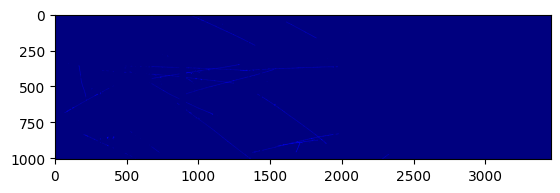

899681.9
[1008, 3456]


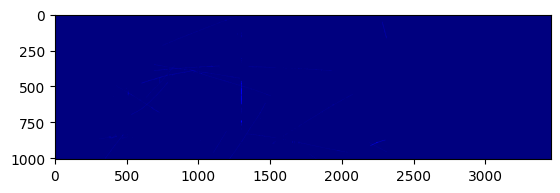

788752.75
[1008, 3456]


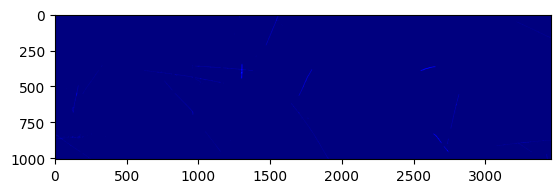

In [8]:

for i, planes in enumerate(wire_branch['_image_v/_image_v._img'].array()[:1]):
    n_planes = len(planes)
    col_count = wire_branch['_image_v/_image_v._meta._col_count'].array()[i]
    row_count = wire_branch['_image_v/_image_v._meta._row_count'].array()[i]
    
    for j, plane in enumerate(planes):
        # print("Plane = ", wire_branch['_image_v/_image_v._meta._plane'].array()[i][j])
        print(sum(plane))
        
        image = np.reshape(plane, (col_count[j], row_count[j]))
        image = np.transpose(image)
        print(np.shape(image))
        plt.imshow(image, cmap='jet')
        plt.show()

In [11]:
_f = ROOT.TFile(_files[0])
_f.ls()

TFile**		files/pandora/larcv_wholeview.root	
 TFile*		files/pandora/larcv_wholeview.root	
  KEY: TTree	image2d_wire_tree;1	wire tree
  KEY: TTree	image2d_pmt_tree;1	pmt tree
  KEY: TTree	chstatus_wire_tree;1	wire tree


Warning in <TClass::Init>: no dictionary for class larcv::EventImage2D is available
Warning in <TClass::Init>: no dictionary for class larcv::EventBase is available
Warning in <TClass::Init>: no dictionary for class larcv::Image2D is available
Warning in <TClass::Init>: no dictionary for class larcv::ImageMeta is available
Warning in <TClass::Init>: no dictionary for class larcv::Point2D is available
Warning in <TClass::Init>: no dictionary for class larcv::EventChStatus is available
Warning in <TClass::Init>: no dictionary for class larcv::ChStatus is available
